      date  REC  GS10  GS3M      FCI  SPREAD10_3FOR
0  1986M01    0  9.19  7.30 -0.34584            NaN
1  1986M02    0  8.70  7.29 -0.35394            NaN
2  1986M03    0  7.78  6.76 -0.31862            NaN
3  1986M04    0  7.30  6.24 -0.37996            NaN
4  1986M05    0  7.71  6.33 -0.50496            NaN

Training SVM...
----------------------------------------
Epoch 1: Accuracy = 0.9438
Epoch 2: Accuracy = 0.9326
Epoch 3: Accuracy = 0.9551
Epoch 4: Accuracy = 0.9551
Epoch 5: Accuracy = 0.9438
Epoch 6: Accuracy = 0.9438
Epoch 7: Accuracy = 0.9551
Epoch 8: Accuracy = 0.9438
Epoch 9: Accuracy = 0.9551
Epoch 10: Accuracy = 0.9438

SVM - Final Metrics after 10 epochs:
Average Accuracy: 0.9472
Average Precision: 1.0000
Average Recall: 0.4125
Average F1-score: 0.5794
Average ROC-AUC Score: 0.8889


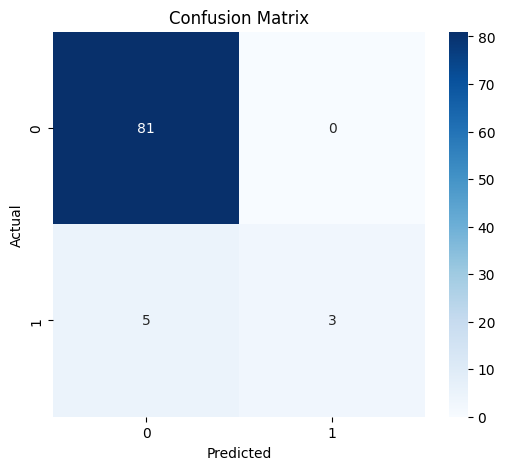

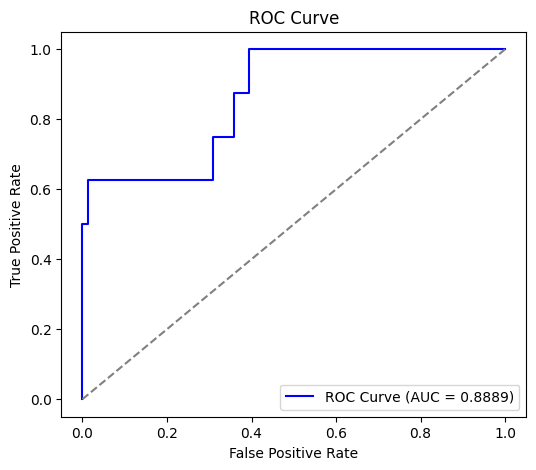

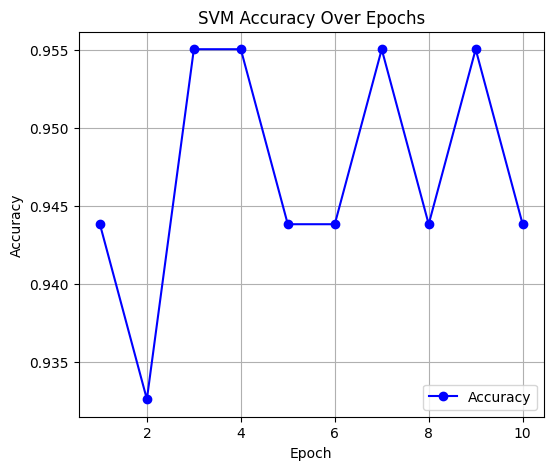

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle, resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve)
from sklearn.svm import SVC

# Load dataset
df = pd.read_csv("//content//ahmed_chinn_data.csv")  # Change to your dataset

# Display first 5 rows
print(df.head())

# Handle missing values
for col in df.columns:
    if df[col].dtype == "object":  # Categorical columns
        df[col] = df[col].fillna(df[col].mode()[0])
    else:  # Numerical columns
        df[col] = df[col].fillna(df[col].mean())

# Encode categorical variables
label_encoders = {}
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Splitting dataset into Features (X) and Target (y)
X = df.drop(columns=['REC'])  # Replace 'REC' with actual target column name
y = df['REC']

# Standardizing numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store performance metrics
epochs = 10
accuracies = []
all_conf_matrices = []
all_precisions = []
all_recalls = []
all_f1s = []
all_roc_aucs = []

print(f"\nTraining SVM...\n" + "-"*40)
for epoch in range(epochs):
    # Bootstrap resampling: Select a random subset of X_train in each epoch
    X_train_sample, y_train_sample = resample(X_train, y_train, replace=True, random_state=epoch)

    # Initialize SVM with a changing random_state and different hyperparameters per epoch
    model = SVC(probability=True, kernel='rbf', C=1 + epoch * 0.1, gamma='scale', random_state=epoch)
    model.fit(X_train_sample, y_train_sample)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    # Calculate evaluation metrics
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, y_prob)

    all_conf_matrices.append(conf_matrix)
    all_precisions.append(precision)
    all_recalls.append(recall)
    all_f1s.append(f1)
    all_roc_aucs.append(roc_auc)

    print(f"Epoch {epoch+1}: Accuracy = {acc:.4f}")

# Compute average metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(all_precisions)
avg_recall = np.mean(all_recalls)
avg_f1 = np.mean(all_f1s)
avg_roc_auc = np.mean(all_roc_aucs)

print(f"\nSVM - Final Metrics after {epochs} epochs:")
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-score: {avg_f1:.4f}")
print(f"Average ROC-AUC Score: {avg_roc_auc:.4f}")

# Visualization - Confusion Matrix (last epoch)
plt.figure(figsize=(6, 5))
sns.heatmap(all_conf_matrices[-1], annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualization - ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {avg_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Visualization - Accuracy over Epochs
plt.figure(figsize=(6, 5))
plt.plot(range(1, epochs+1), accuracies, marker='o', linestyle='-', color='blue', label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


      date  REC  GS10  GS3M      FCI  SPREAD10_3FOR
0  1986M01    0  9.19  7.30 -0.34584            NaN
1  1986M02    0  8.70  7.29 -0.35394            NaN
2  1986M03    0  7.78  6.76 -0.31862            NaN
3  1986M04    0  7.30  6.24 -0.37996            NaN
4  1986M05    0  7.71  6.33 -0.50496            NaN

Training XGBoost...
----------------------------------------
Epoch 1: Accuracy = 0.9326
Epoch 2: Accuracy = 0.9888
Epoch 3: Accuracy = 0.9663
Epoch 4: Accuracy = 0.9438
Epoch 5: Accuracy = 0.9888
Epoch 6: Accuracy = 0.9663
Epoch 7: Accuracy = 0.9888
Epoch 8: Accuracy = 0.9775
Epoch 9: Accuracy = 0.9438
Epoch 10: Accuracy = 0.9326

XGBoost - Final Metrics after 10 epochs:
Average Accuracy: 0.9629
Average Precision: 0.8673
Average Recall: 0.7125
Average F1-score: 0.7765
Average ROC-AUC Score: 0.9631


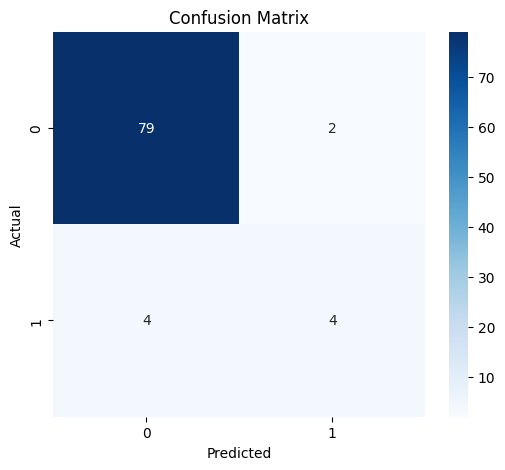

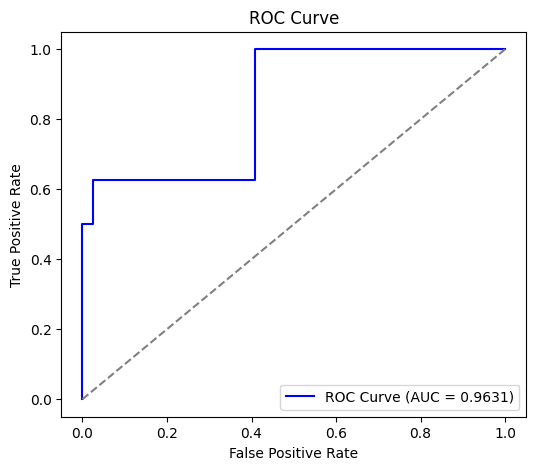

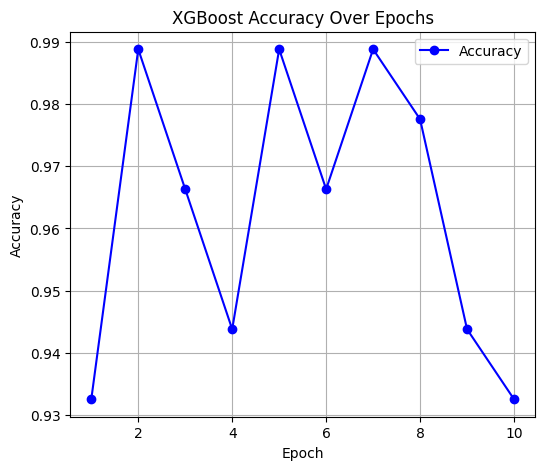

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle, resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve)
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv("//content//ahmed_chinn_data.csv")  # Change to your dataset

# Display first 5 rows
print(df.head())

# Handle missing values
for col in df.columns:
    if df[col].dtype == "object":  # Categorical columns
        df[col] = df[col].fillna(df[col].mode()[0])
    else:  # Numerical columns
        df[col] = df[col].fillna(df[col].mean())

# Encode categorical variables
label_encoders = {}
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Splitting dataset into Features (X) and Target (y)
X = df.drop(columns=['REC'])  # Replace 'REC' with actual target column name
y = df['REC']

# Standardizing numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance by computing scale_pos_weight
num_pos = np.sum(y_train == 1)
num_neg = np.sum(y_train == 0)
scale_pos_weight = num_neg / num_pos  # Balancing weight

# Store performance metrics
epochs = 10
accuracies = []
all_conf_matrices = []
all_precisions = []
all_recalls = []
all_f1s = []
all_roc_aucs = []

print(f"\nTraining XGBoost...\n" + "-"*40)
for epoch in range(epochs):
    # Bootstrap resampling: Select a random subset of X_train in each epoch
    X_train_sample, y_train_sample = resample(X_train, y_train, replace=True, random_state=epoch)

    # Initialize XGBoost with epoch-dependent learning rate
    model = XGBClassifier(
        eval_metric="logloss",
        learning_rate=0.1 - (epoch * 0.005),  # Gradually decreasing LR
        n_estimators=100 + (epoch * 10),  # More estimators over epochs
        max_depth=5,
        scale_pos_weight=scale_pos_weight,
        random_state=epoch
    )

    model.fit(X_train_sample, y_train_sample)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    # Calculate evaluation metrics
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, y_prob)

    all_conf_matrices.append(conf_matrix)
    all_precisions.append(precision)
    all_recalls.append(recall)
    all_f1s.append(f1)
    all_roc_aucs.append(roc_auc)

    print(f"Epoch {epoch+1}: Accuracy = {acc:.4f}")

# Compute average metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(all_precisions)
avg_recall = np.mean(all_recalls)
avg_f1 = np.mean(all_f1s)
avg_roc_auc = np.mean(all_roc_aucs)

print(f"\nXGBoost - Final Metrics after {epochs} epochs:")
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-score: {avg_f1:.4f}")
print(f"Average ROC-AUC Score: {avg_roc_auc:.4f}")

# Visualization - Confusion Matrix (last epoch)
plt.figure(figsize=(6, 5))
sns.heatmap(all_conf_matrices[-1], annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualization - ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {avg_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Visualization - Accuracy over Epochs
plt.figure(figsize=(6, 5))
plt.plot(range(1, epochs+1), accuracies, marker='o', linestyle='-', color='blue', label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


      date  REC  GS10  GS3M      FCI  SPREAD10_3FOR
0  1986M01    0  9.19  7.30 -0.34584            NaN
1  1986M02    0  8.70  7.29 -0.35394            NaN
2  1986M03    0  7.78  6.76 -0.31862            NaN
3  1986M04    0  7.30  6.24 -0.37996            NaN
4  1986M05    0  7.71  6.33 -0.50496            NaN

Training KNN...
----------------------------------------
Epoch 1: Accuracy = 0.9326, k = 3
Epoch 2: Accuracy = 0.9438, k = 4
Epoch 3: Accuracy = 0.9551, k = 5
Epoch 4: Accuracy = 0.9438, k = 6
Epoch 5: Accuracy = 0.9326, k = 7
Epoch 6: Accuracy = 0.9551, k = 3
Epoch 7: Accuracy = 0.9438, k = 4
Epoch 8: Accuracy = 0.9326, k = 5
Epoch 9: Accuracy = 0.9551, k = 6
Epoch 10: Accuracy = 0.9551, k = 7

KNN - Final Metrics after 10 epochs:
Average Accuracy: 0.9449
Average Precision: 0.8481
Average Recall: 0.4875
Average F1-score: 0.6136
Average ROC-AUC Score: 0.8038


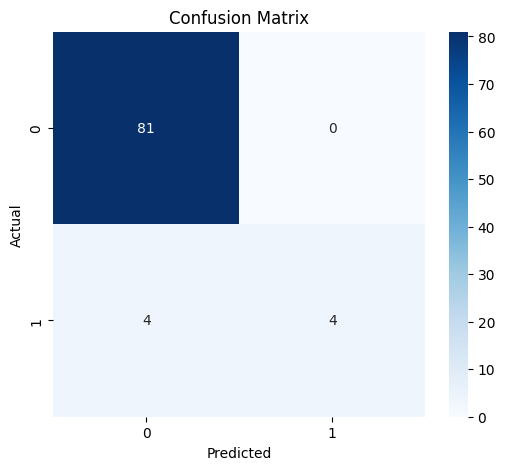

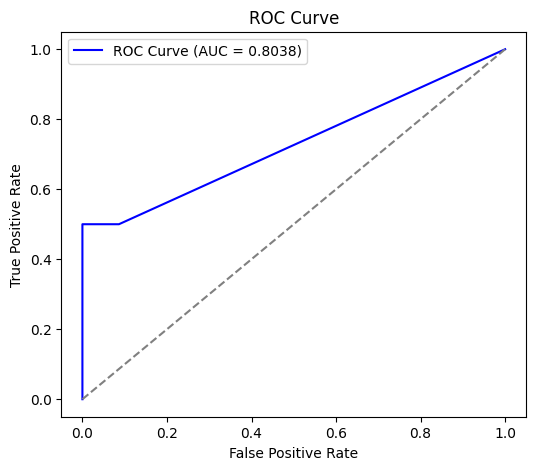

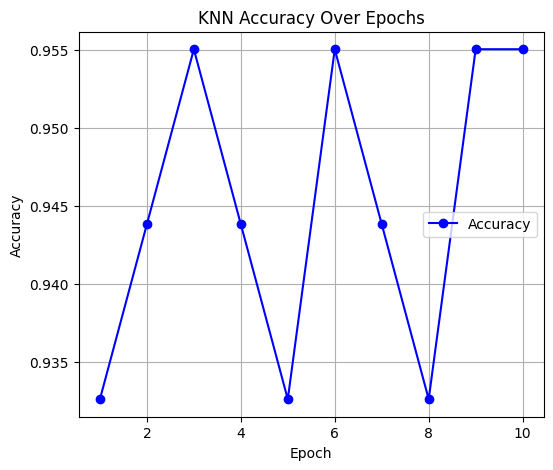

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle, resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve)
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
df = pd.read_csv("//content//ahmed_chinn_data.csv")  # Change to your dataset

# Display first 5 rows
print(df.head())

# Handle missing values
for col in df.columns:
    if df[col].dtype == "object":  # Categorical columns
        df[col] = df[col].fillna(df[col].mode()[0])
    else:  # Numerical columns
        df[col] = df[col].fillna(df[col].mean())

# Encode categorical variables
label_encoders = {}
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Splitting dataset into Features (X) and Target (y)
X = df.drop(columns=['REC'])  # Replace 'REC' with actual target column name
y = df['REC']

# Standardizing numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store performance metrics
epochs = 10
accuracies = []
all_conf_matrices = []
all_precisions = []
all_recalls = []
all_f1s = []
all_roc_aucs = []

print(f"\nTraining KNN...\n" + "-"*40)
for epoch in range(epochs):
    # Bootstrap resampling: Select a random subset of X_train in each epoch
    X_train_sample, y_train_sample = resample(X_train, y_train, replace=True, random_state=epoch)

    # Vary number of neighbors dynamically
    k_neighbors = 3 + (epoch % 5)  # Range: 3 to 7
    model = KNeighborsClassifier(n_neighbors=k_neighbors, metric='minkowski', p=2)

    model.fit(X_train_sample, y_train_sample)
    y_pred = model.predict(X_test)

    # Convert to probabilities for ROC-AUC (KNN does not support `predict_proba` for binary classification)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    # Calculate evaluation metrics
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, y_prob)

    all_conf_matrices.append(conf_matrix)
    all_precisions.append(precision)
    all_recalls.append(recall)
    all_f1s.append(f1)
    all_roc_aucs.append(roc_auc)

    print(f"Epoch {epoch+1}: Accuracy = {acc:.4f}, k = {k_neighbors}")

# Compute average metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(all_precisions)
avg_recall = np.mean(all_recalls)
avg_f1 = np.mean(all_f1s)
avg_roc_auc = np.mean(all_roc_aucs)

print(f"\nKNN - Final Metrics after {epochs} epochs:")
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-score: {avg_f1:.4f}")
print(f"Average ROC-AUC Score: {avg_roc_auc:.4f}")

# Visualization - Confusion Matrix (last epoch)
plt.figure(figsize=(6, 5))
sns.heatmap(all_conf_matrices[-1], annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualization - ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {avg_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Visualization - Accuracy over Epochs
plt.figure(figsize=(6, 5))
plt.plot(range(1, epochs+1), accuracies, marker='o', linestyle='-', color='blue', label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()
